# HW05_YUANJUN GE

### Q1.2 

In [487]:
import numpy as np
import matplotlib.pyplot as plt

In [488]:
mean_a = np.array([-1,-1])
var_a = np.array([[2,0.5],[0.5,1]])
mean_b = np.array([1,-1])
var_b = np.array([[1,-0.5],[-0.5,2]])
mean_c = np.array([0,1])
var_c = np.array([[1,0],[0,2]])

sigmaArr = np.array([0.5, 1, 2, 4, 8])

# random sampling
def sample(sigma):
    sample1 = np.random.multivariate_normal(mean_a,sigma*var_a,100)
    sample2 = np.random.multivariate_normal(mean_b,sigma*var_b,100)
    sample3 = np.random.multivariate_normal(mean_c,sigma*var_c,100)
    return np.concatenate((sample1,sample2,sample3))

sample1 = sample(sigmaArr[0])
sample2 = sample(sigmaArr[1])
sample3 = sample(sigmaArr[2])
sample4 = sample(sigmaArr[3])
sample5 = sample(sigmaArr[4])

In [489]:
# k_mean clustring algorithm
def k_mean(sample, k):
    # step 1: randomly initialize the centroids
    centroids = sample[np.random.choice(len(sample),k,replace=False)]
    # step 2: assign each sample to the nearest centroid
    def assign(sample, centroids):
        label = np.zeros(len(sample))
        for i in range(len(label)):
            label[i] = np.argmin(np.linalg.norm(sample[i]-centroids,axis=1))
        return label
    # step 3: update the centroids
    def update(sample,label):
        centroids = np.zeros((k,sample.shape[1]))
        for i in range(k):
            centroids[i] = np.mean(sample[label==i],axis =0)
        return centroids    
    # step 4: repeat step 2 and 3 until convergence
    while True:
        label = assign(sample,centroids)
        new_centroids = update(sample,label)
        if np.array_equal(centroids,new_centroids):
            break
        else:
            centroids = new_centroids
    return centroids, label


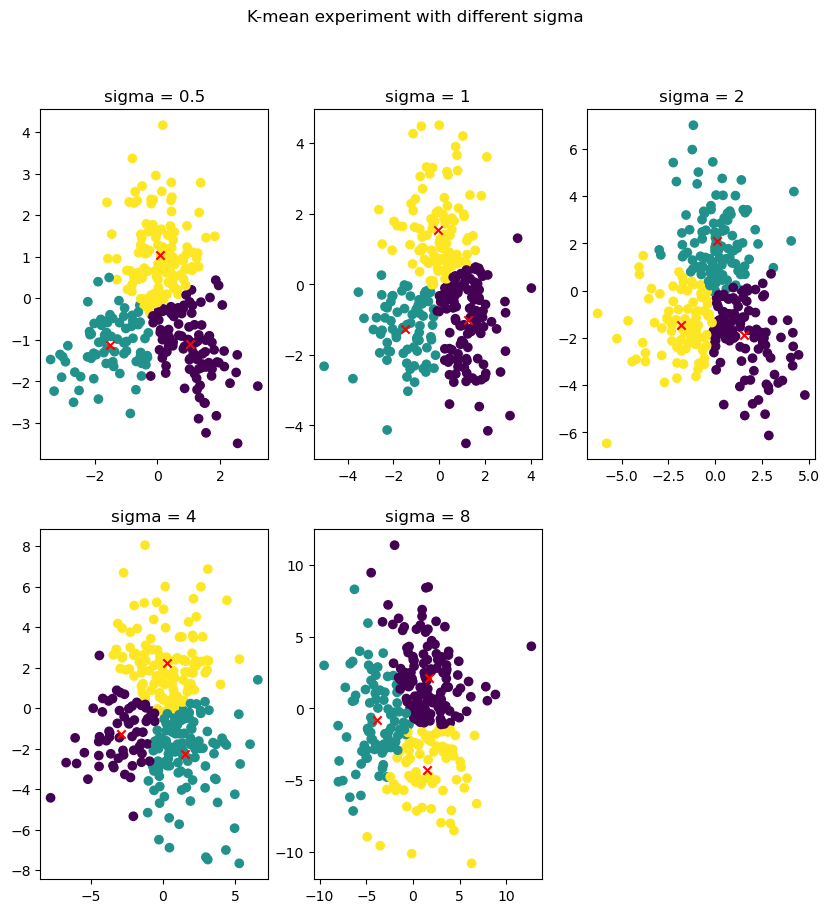

In [490]:
centroids1, label1 = k_mean(sample1,3)
centroids2, label2 = k_mean(sample2,3)
centroids3, label3 = k_mean(sample3,3)
centroids4, label4 = k_mean(sample4,3)
centroids5, label5 = k_mean(sample5,3)


plt.figure(figsize=(10,10))
plt.suptitle('K-mean experiment with different sigma')
plt.subplot(2, 3, 1)
plt.scatter(sample1[:, 0], sample1[:, 1], c=label1)
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='x', c='r')
plt.title('sigma = 0.5')
plt.subplot(2, 3, 2)
plt.scatter(sample2[:, 0], sample2[:, 1], c=label2)
plt.scatter(centroids2[:, 0], centroids2[:, 1], marker='x', c='r')
plt.title('sigma = 1')
plt.subplot(2, 3, 3)
plt.scatter(sample3[:, 0], sample3[:, 1], c=label3)
plt.scatter(centroids3[:, 0], centroids3[:, 1], marker='x', c='r')
plt.title('sigma = 2')
plt.subplot(2, 3, 4)
plt.scatter(sample4[:, 0], sample4[:, 1], c=label4)
plt.scatter(centroids4[:, 0], centroids4[:, 1], marker='x', c='r')
plt.title('sigma = 4')
plt.subplot(2, 3, 5)
plt.scatter(sample5[:, 0], sample5[:, 1], c=label5)
plt.scatter(centroids5[:, 0], centroids5[:, 1], marker='x', c='r')
plt.title('sigma = 8')
plt.show()

In [491]:
#evaluation
def eval_kmean(sample, label, centroids):
    obj = 0
    for i in range(sample.shape[0]):
        obj += np.linalg.norm(sample[i]-centroids[int(label[i])])**2

    means=np.array([[-1,-1],[1,-1],[0,1]])
    mapping = {}
    for i in range(len(centroids)):
        mindist = np.inf
        for j in range(len(means)):
            dist  = np.linalg.norm(centroids[i]-means[j])
            if dist < mindist:
                mindist = dist
                mapping[i] = j

    for i in range(len(label)):
        label[i] = mapping[label[i]]
    acc = 0
    true_label = np.array([0]*100 + [1]*100 + [2]*100)
    for i in range(len(label)):
        if label[i] == true_label[i]:
            acc +=1
    accuracy= acc/300

    return accuracy,obj
    
accuracy = []
obj = []
for i in range(1,6):
    sample = globals()['sample'+str(i)]
    label = globals()['label'+str(i)]
    centroids = globals()['centroids'+str(i)]
    a, o = eval_kmean(sample, label, centroids)
    accuracy.append(a)
    obj.append(o)
print('sigma = 0.5, accuracy =',accuracy[0],'. ', 'sum of squared distances =',obj[0])
print('sigma = 1, accuracy =',accuracy[1],'. ', 'sum of squared distances =',obj[1])
print('sigma = 2, accuracy =',accuracy[2],'. ', 'sum of squared distances =',obj[2])
print('sigma = 4, accuracy =',accuracy[3],'. ', 'sum of squared distances =',obj[3])
print('sigma = 8, accuracy =',accuracy[4],'. ', 'sum of squared distances =',obj[4])

sigma = 0.5, accuracy = 0.7866666666666666 .  sum of squared distances = 334.6880142638786
sigma = 1, accuracy = 0.7466666666666667 .  sum of squared distances = 530.0953544668354
sigma = 2, accuracy = 0.66 .  sum of squared distances = 1036.4945823392168
sigma = 4, accuracy = 0.5133333333333333 .  sum of squared distances = 1648.4562030141747
sigma = 8, accuracy = 0.48 .  sum of squared distances = 3403.5995561478585


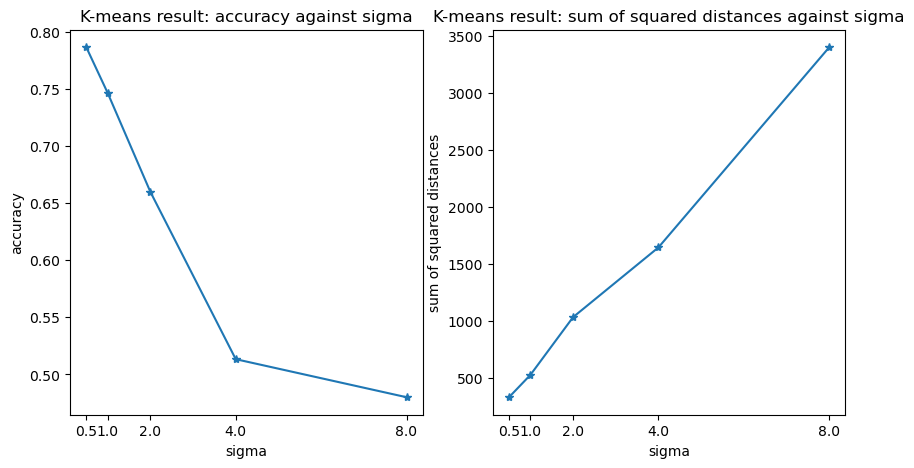

In [492]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sigmaArr, accuracy , marker= '*')
plt.title('K-means result: accuracy against sigma')
plt.xlabel('sigma')
plt.xticks(sigmaArr)
plt.ylabel('accuracy')
plt.subplot(1, 2, 2)
plt.plot(sigmaArr, obj,marker= '*')
plt.xlabel('sigma')
plt.xticks(sigmaArr)
plt.ylabel('sum of squared distances')
plt.title('K-means result: sum of squared distances against sigma')
plt.show()

In [493]:
import scipy.stats as ss
# GMM_EM
def EM(sample, k):
    # step 1: initialize the parameters
    params = {}
    params['weight'] = np.ones(k) / k
    params['mean'] = sample[np.random.choice(len(sample),k,replace=False)]
    params['convar'] = np.array([np.identity(sample.shape[1])] * k)

    # step 2: compute the responsibilities
    def responsibilities(sample,params):
        re = np.zeros((sample.shape[0],k))
        for i in range(k):
            re[:, i] = params['weight'][i] * ss.multivariate_normal.pdf(sample, params['mean'][i], params['convar'][i], allow_singular=True)
        re = re / np.sum(re, axis=1, keepdims=True)
        return re
    
    # step 3: update the parameters
    def update(sample,re):
        params['weight'] = np.mean(re,axis=0)
        params['mean'] = np.dot(re.T, sample) / np.sum(re, axis=0, keepdims=True).T
        params['convar'] = np.zeros((k, sample.shape[1], sample.shape[1]))
        for i in range(k):
            params['convar'][i] = np.dot(re[:, i] * ( sample - params['mean'][i]).T, ( sample - params['mean'][i])) / np.sum(re[:, i])
        return params

    # step 4: repeat EM
    while True:
        re = responsibilities(sample,params)
        new_p = update(sample,re)
        if np.allclose(params['mean'],new_p['mean']) and np.allclose(params['convar'],new_p['convar']):
            break
        params = new_p
    
    label = re.argmax(axis=1)
    return params, label

p1,l1=EM(sample1,3)
p2,l2=EM(sample2,3)
p3,l3=EM(sample3,3)
p4,l4=EM(sample4,3)
p5,l5=EM(sample5,3)


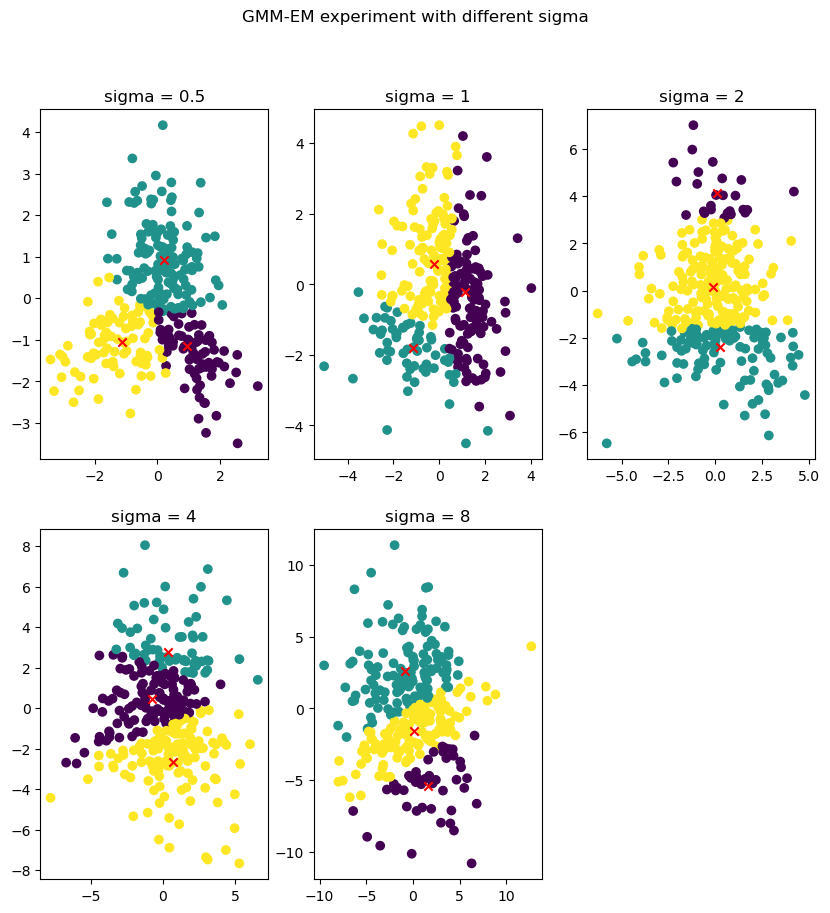

In [494]:
plt.figure(figsize=(10,10))
plt.suptitle('GMM-EM experiment with different sigma')
plt.subplot(2, 3, 1)
plt.scatter(sample1[:, 0], sample1[:, 1], c=l1)
plt.scatter(p1['mean'][:, 0], p1['mean'][:, 1], marker='x', c='r')
plt.title('sigma = 0.5')
plt.subplot(2, 3, 2)
plt.scatter(sample2[:, 0], sample2[:, 1], c=l2)
plt.scatter(p2['mean'][:, 0], p2['mean'][:, 1], marker='x', c='r')
plt.title('sigma = 1')
plt.subplot(2, 3, 3)
plt.scatter(sample3[:, 0], sample3[:, 1], c=l3)
plt.scatter(p3['mean'][:, 0], p3['mean'][:, 1], marker='x', c='r')
plt.title('sigma = 2')
plt.subplot(2, 3, 4)
plt.scatter(sample4[:, 0], sample4[:, 1], c=l4)
plt.scatter(p4['mean'][:, 0], p4['mean'][:, 1], marker='x', c='r')
plt.title('sigma = 4')
plt.subplot(2, 3, 5)
plt.scatter(sample5[:, 0], sample5[:, 1], c=l5)
plt.scatter(p5['mean'][:, 0], p5['mean'][:, 1], marker='x', c='r')
plt.title('sigma = 8')
plt.show()

In [495]:
#evaluation——EM
def eval_em(sample, label,params ):
    centroids = params['mean']
    convar = params['convar']
    total_negative_log_likelihood = 0
    for i in range(len(centroids)):
        cluster_points = sample[label == i]
        if len(cluster_points) > 0:
            log_likelihood = ss.multivariate_normal.logpdf(cluster_points, mean=centroids[i], cov=convar[i])
            total_negative_log_likelihood -= np.sum(log_likelihood) 

    means=np.array([[-1,-1],[1,-1],[0,1]])
    mapping = {}
    for i in range(len(centroids)):
        mindist = np.inf
        for j in range(len(means)):
            dist  = np.linalg.norm(centroids[i]-means[j])
            if dist < mindist:
                mindist = dist
                mapping[i] = j

    for i in range(len(label)):
        label[i] = mapping[label[i]]
    acc = 0
    true_label = np.array([0]*100 + [1]*100 + [2]*100)
    for i in range(len(label)):
        if label[i] == true_label[i]:
            acc +=1
    accuracy= acc/300

    return accuracy,total_negative_log_likelihood

    
accuracy_em = []
total_log_likelihood = []
for i in range(1,6):
    sample = globals()['sample'+str(i)]
    label = globals()['l'+str(i)]
    params = globals()['p'+str(i)]
    a, o = eval_em(sample, label, params)
    accuracy_em.append(a)
    total_log_likelihood.append(o)

print('sigma = 0.5, accuracy =',accuracy_em[0],'. ', 'total_log_likelihood =',total_log_likelihood[0])
print('sigma = 1, accuracy =',accuracy_em[1],'. ', 'total_log_likelihood=',total_log_likelihood[1])
print('sigma = 2, accuracy =',accuracy_em[2],'. ', 'total_log_likelihood =',total_log_likelihood[2])
print('sigma = 4, accuracy =',accuracy_em[3],'. ', 'total_log_likelihood=',total_log_likelihood[3])
print('sigma = 8, accuracy =',accuracy_em[4],'. ', 'total_log_likelihood =',total_log_likelihood[4])

sigma = 0.5, accuracy = 0.7633333333333333 .  total_log_likelihood = 682.6461048429809
sigma = 1, accuracy = 0.65 .  total_log_likelihood= 864.2858723662143
sigma = 2, accuracy = 0.47333333333333333 .  total_log_likelihood = 1074.0985353261858
sigma = 4, accuracy = 0.44666666666666666 .  total_log_likelihood= 1178.3007409085678
sigma = 8, accuracy = 0.4033333333333333 .  total_log_likelihood = 1349.894012333305


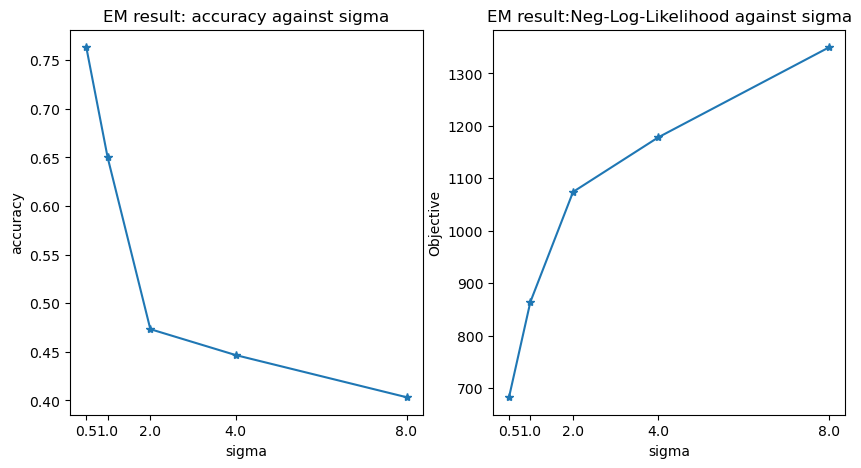

In [496]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sigmaArr, accuracy_em , marker= '*')
plt.title('EM result: accuracy against sigma')
plt.xlabel('sigma')
plt.xticks(sigmaArr)
plt.ylabel('accuracy')
plt.subplot(1, 2, 2)
plt.plot(sigmaArr, total_log_likelihood,marker= '*')
plt.xlabel('sigma')
plt.xticks(sigmaArr)
plt.ylabel('Objective')
plt.title('EM result:Neg-Log-Likelihood against sigma')
plt.show()

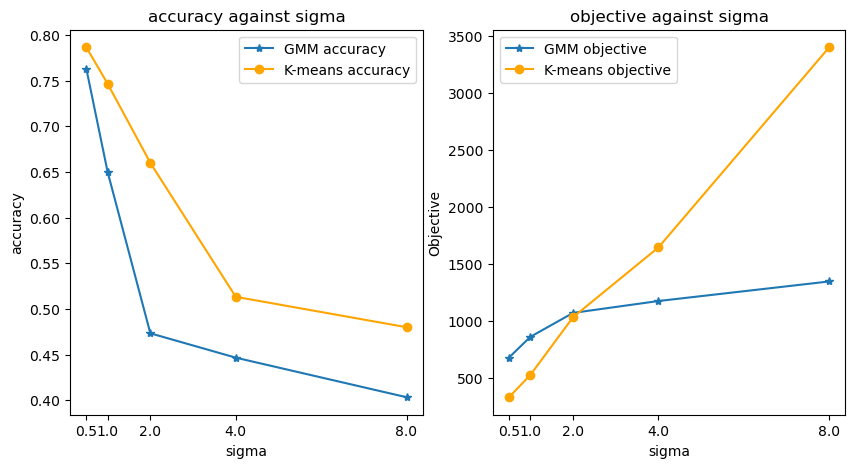

In [501]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sigmaArr, accuracy_em ,label = 'GMM accuracy', marker= '*')
plt.plot(sigmaArr, accuracy ,label = 'K-means accuracy', marker= 'o',c = 'orange')
plt.title('accuracy against sigma')
plt.xlabel('sigma')
plt.legend()
plt.xticks(sigmaArr)
plt.ylabel('accuracy')
plt.subplot(1, 2, 2)
plt.plot(sigmaArr, total_log_likelihood,marker= '*',label = 'GMM objective')
plt.plot(sigmaArr, obj ,label = 'K-means objective', marker= 'o',c = 'orange')
plt.xlabel('sigma')
plt.xticks(sigmaArr)
plt.ylabel('Objective')
plt.legend()
plt.title('objective against sigma')
plt.show()